In [2]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from scipy import integrate
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support,make_scorer


In [3]:
DATA_PATH = '../data/features/'

tran = pd.read_pickle(DATA_PATH + "T.pickle")
ntran = pd.read_pickle(DATA_PATH + "NT.pickle")

In [3]:
ntran.head()


,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly3_t3,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
CataID1121048016765,0,non-transient,37,1.325,0.270270,0.085689,0.139318,0.186693,0.273474,0.379936,0.806118,...,9.275549e-12,-0.000078,5.795073e-09,1.657338e-10,1.347946e-13,-0.121108,-3.267227,0.520336,-0.213986,0.658328
CataID1121048016959,0,non-transient,162,1.285,0.333333,0.121476,0.216808,0.321775,0.543173,0.720385,-0.216866,...,5.519138e-11,-0.000104,1.175388e-07,5.420264e-11,-1.443238e-15,-0.027053,-3.056722,0.497320,0.158238,0.711336
CataID1112021056668,0,non-transient,25,1.090,0.440000,0.074063,0.118072,0.167083,0.239397,0.649333,-0.578216,...,-2.461033e-10,0.000196,2.293719e-07,-2.428915e-10,3.115327e-14,-0.402302,-3.415020,0.617377,-0.326482,0.714699
CataID1112021056680,0,non-transient,342,0.770,0.201754,0.089792,0.222260,0.329158,0.509584,0.750055,4.943506,...,3.174950e-11,-0.000015,1.679038e-08,2.447224e-11,-1.943614e-14,1.654544,-3.026575,0.211430,0.096149,0.745172
CataID1112021056719,0,non-transient,368,0.210,0.271739,0.131166,0.262401,0.393776,0.525359,0.789431,1.958833,...,-1.345298e-12,0.000005,-3.588746e-08,2.733594e-12,1.793104e-14,-0.325084,-3.024680,0.049496,0.060285,0.769558


In [4]:
feats = np.array(tran.columns[2:])
print(len(feats))
print(feats)

30
['amplitude' 'beyond1st' 'flux_percentile_ratio_mid20'
 'flux_percentile_ratio_mid35' 'flux_percentile_ratio_mid50'
 'flux_percentile_ratio_mid65' 'flux_percentile_ratio_mid80' 'kurtosis'
 'max_slope' 'median_absolute_deviation' 'median_buffer_range_percentage'
 'pair_slope_trend' 'pair_slope_trend_last_30' 'percent_amplitude'
 'percent_difference_flux_percentile' 'poly1_t1' 'poly2_t1' 'poly2_t2'
 'poly3_t1' 'poly3_t2' 'poly3_t3' 'poly4_t1' 'poly4_t2' 'poly4_t3'
 'poly4_t4' 'skew' 'small_kurtosis' 'std' 'stetson_j' 'stetson_k']


In [5]:
alldf = pd.concat([tran,ntran])

In [1]:
recall_scores = []
iterations = 100
for i in range(iterations):
    print("{:.2f}%".format(i*100/iterations))
    alldf = alldf.sample(frac=1)

    alldf['target'] = list(map(lambda x: 1 if x!='non-transient' else 0, alldf.Class))

    all_train, all_test = train_test_split(alldf,test_size = 0.25)
    all_test = all_test[all_test.index.get_level_values('copy_num')==0]

    clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
    clf.fit(all_train[feats], all_train.target)

    
    recall_scores.append(recall_score(all_test.target,clf.predict(all_test[feats])))

0.00%


NameError: name 'alldf' is not defined

Text(0.5,0,'Recall scores')

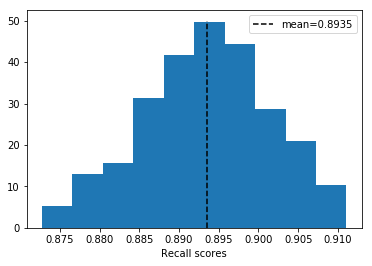

In [89]:
mean = np.mean(recall_scores)
plt.hist(recall_scores,density=True)
plt.plot([mean,mean],[0,50],c='black',linestyle='--',label='mean={:.4f}'.format(mean))
plt.legend()
plt.xlabel('Recall scores')

# 6-Transient Classification
AGN, Blazar, CV, Flare, HPM and
Supernovae

In [4]:
tran.Class.unique()

array(['SN?', 'Flare', 'SN', 'Var?', 'Blazar', 'SN/TDE', 'CV', 'AGN?',
       'Unknown', 'SN/AGN', 'Var', 'AGN', 'SN/CV', 'Var/Nothing', 'LPV',
       'Flare?', 'CV?', 'Var/SN', 'CV/AGN?', 'Blazar?', 'HPM', 'Comet',
       'Nova', 'SDSS', 'Carb', 'O/Ne', 'Variable', 'Carbon', 'AGN/Var',
       'CV/SN', 'Var/AGN', 'CV/Var', 'YSO', 'OH-IR', 'Mira', 'YSO?', 'FU',
       'AGN/SN?', 'OH_IR', 'Blazar/SN', 'CV/AGN', 'Blazar/AGN',
       'LHS_5157', 'Very', 'Var/nothing?', 'QSO', 'AGN/SN', 'AGN/Blazar',
       'SN/nothing?', 'SN/Ast', 'Maser', 'UvES', 'SN/AGN?', 'Red',
       'AGN/CV', 'RRL', 'Merger/CV?', 'AGB', 'RCorB', 'RRLyrae',
       'Var/Ast?', 'HPM/Var?', 'Ast?', 'Ast/SN?', 'Ast', 'Var/SN?',
       'Ast/Var?', 'Var/Nova', 'SN/Var?', 'AGN/Var?', 'SN/Ast?', 'SN/Var',
       'CV/Flare', 'Ast/Var', 'Comet/Ast?', 'Var/Ast', 'SN/CV?', 'AMCVn?',
       'Ast/SN', 'Ast/Var??', 'CV/Var/Ast', 'Ast/Flare?', 'AGN/nothing?',
       'TDE?', 'GRB', 'Ast/Flare', 'Lensing/nothing?', 'Flare/SN', 'HPM?',


In [5]:
labels = ['SN', 'CV', 'AGN', 'HPM', 'Blazar', 'Flare']

In [6]:
six_tran = tran[tran.Class.isin(labels)]

In [7]:
factorized, uniques = pd.factorize(six_tran.Class)

In [8]:
# six_tran.loc[:,'target']= list(factorized)
six_tran = six_tran.assign(target=factorized)

In [9]:
feats = np.array(six_tran.columns[2:-1])
print(feats)

['amplitude' 'beyond1st' 'flux_percentile_ratio_mid20'
 'flux_percentile_ratio_mid35' 'flux_percentile_ratio_mid50'
 'flux_percentile_ratio_mid65' 'flux_percentile_ratio_mid80' 'kurtosis'
 'max_slope' 'median_absolute_deviation' 'median_buffer_range_percentage'
 'pair_slope_trend' 'pair_slope_trend_last_30' 'percent_amplitude'
 'percent_difference_flux_percentile' 'poly1_t1' 'poly2_t1' 'poly2_t2'
 'poly3_t1' 'poly3_t2' 'poly3_t3' 'poly4_t1' 'poly4_t2' 'poly4_t3'
 'poly4_t4' 'skew' 'small_kurtosis' 'std' 'stetson_j' 'stetson_k']


In [10]:
recalls = []

for i in range(20):
    six_tran = six_tran.sample(frac=1)
    all_train, all_test = train_test_split(six_tran,test_size = 0.25)
    all_test = all_test[all_test.index.get_level_values('copy_num')==0]

    clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
    clf.fit(all_train[feats], all_train.target)


    recalls.append(recall_score(all_test.target,clf.predict(all_test[feats]),average='weighted'))

KeyboardInterrupt: 

In [ ]:
plt.hist(recalls)

In [11]:
all_train, all_test = train_test_split(six_tran,test_size = 0.25)
all_test = all_test[all_test.index.get_level_values('copy_num')==0]

clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[feats], all_train.target)



RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [14]:
scores = precision_recall_fscore_support(
        all_test.target, clf.predict(all_test[feats]), average='weighted')
print(scores)

(0.9215000704265371, 0.9163722025912838, 0.914644200719081, None)


## trying out with GridSearch

In [19]:
def rf():
    params = {
        'n_estimators': [200, 700],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    return RandomForestClassifier(random_state=0, class_weight='balanced'), params
def scorers():
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='weighted'),
               'recall': make_scorer(recall_score, average='weighted'),
               'f1_score': make_scorer(f1_score, average='weighted')
               }
    return scoring


In [22]:
model,params = rf()

grid_search = GridSearchCV(model, params, cv=StratifiedKFold(2), scoring=scorers(),
                               refit='f1_score', return_train_score=True,verbose=100)
grid_search.fit(all_train[feats], all_train.target)
# Copy classifier
clf = grid_search

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=0.8885491737642862, precision=0.8961327953586066, recall=0.8885491737642862, f1_score=0.8874949082635282, total=  12.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=0.8924645067346196, precision=0.9002584391771656, recall=0.8924645067346196, f1_score=0.8904475289116545, total=  11.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.5s remaining:    0.0s
[CV] max_features=auto, n_estimators=700 .............................
[CV]  max_features=auto, n_estimators=700, accuracy=0.889495523039965, precision=0.896750173434838, recall=0.889495523039965, f1_score=0.8884720921955408, total=  39.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  

In [23]:
scores = precision_recall_fscore_support(
        all_test.target, clf.predict(all_test[feats]), average='weighted')
print(scores)

(0.9232713301617896, 0.917550058892815, 0.915938190337745, None)


In [24]:
pd.crosstab(clf.predict(all_test[feats]), all_test.target)

target,0,1,2,3,4,5
row_0,,,,,,
0,36,2,0,1,0,0
1,16,312,10,9,17,0
2,0,0,53,0,0,0
3,1,0,1,206,0,0
4,0,3,5,0,102,0
5,1,2,0,2,0,70


# 7-Transient Classification

In [11]:
labels = ['SN', 'CV', 'AGN', 'HPM', 'Blazar', 'Flare']

In [12]:
tran.loc[~tran.Class.isin(labels), ['Class']] = 'Other'

In [13]:
tran.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly3_t3,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1409030010044114444,0,Other,13,1.12135,0.307692,0.067363,0.145074,0.159700,0.296120,0.519169,-0.552947,...,1.774041e-10,-0.000117,1.393948e-07,2.573913e-10,-3.677913e-13,-0.287598,-3.927273,0.681471,-0.562822,0.707972
TranID1209210010044118805,0,Flare,68,2.56960,0.352941,0.043604,0.077573,0.111773,0.140895,0.215354,10.041946,...,1.418397e-10,-0.000269,-7.297054e-07,4.150062e-11,2.744152e-13,-2.355343,-3.139161,0.788365,0.941645,0.322600
TranID1310250040014131234,0,SN,185,1.88140,0.297297,0.025245,0.061235,0.082459,0.126591,0.314544,3.159501,...,-2.623620e-10,0.000095,4.197685e-07,-2.467111e-10,-2.952595e-13,-1.412739,-3.049541,0.656324,1.700725,0.492124
TranID801010040034114166,0,Other,26,1.27585,0.384615,0.178109,0.267323,0.307942,0.636355,0.910583,-0.590139,...,-3.794982e-10,0.000357,-1.531308e-06,5.664993e-12,7.185570e-13,-0.458774,-3.396739,0.686460,0.922882,0.738895
TranID1011080040044131101,0,SN,41,1.46335,0.439024,0.031154,0.055487,0.073229,0.405480,0.874745,-0.155772,...,4.323233e-10,-0.000240,1.428477e-06,9.526601e-12,-6.340534e-13,-0.794969,-3.238866,0.753666,0.984150,0.627376


In [14]:
factorized, uniques = pd.factorize(tran.Class)

In [17]:
uniques

Index(['Other', 'Flare', 'SN', 'Blazar', 'CV', 'AGN', 'HPM'], dtype='object')

In [15]:
tran = tran.assign(target=factorized)

In [16]:
tran.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,target
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1409030010044114444,0,Other,13,1.12135,0.307692,0.067363,0.145074,0.159700,0.296120,0.519169,-0.552947,...,-0.000117,1.393948e-07,2.573913e-10,-3.677913e-13,-0.287598,-3.927273,0.681471,-0.562822,0.707972,0
TranID1209210010044118805,0,Flare,68,2.56960,0.352941,0.043604,0.077573,0.111773,0.140895,0.215354,10.041946,...,-0.000269,-7.297054e-07,4.150062e-11,2.744152e-13,-2.355343,-3.139161,0.788365,0.941645,0.322600,1
TranID1310250040014131234,0,SN,185,1.88140,0.297297,0.025245,0.061235,0.082459,0.126591,0.314544,3.159501,...,0.000095,4.197685e-07,-2.467111e-10,-2.952595e-13,-1.412739,-3.049541,0.656324,1.700725,0.492124,2
TranID801010040034114166,0,Other,26,1.27585,0.384615,0.178109,0.267323,0.307942,0.636355,0.910583,-0.590139,...,0.000357,-1.531308e-06,5.664993e-12,7.185570e-13,-0.458774,-3.396739,0.686460,0.922882,0.738895,0
TranID1011080040044131101,0,SN,41,1.46335,0.439024,0.031154,0.055487,0.073229,0.405480,0.874745,-0.155772,...,-0.000240,1.428477e-06,9.526601e-12,-6.340534e-13,-0.794969,-3.238866,0.753666,0.984150,0.627376,2


In [19]:
feats = np.array(tran.columns[2:-1])
print(feats)

['amplitude' 'beyond1st' 'flux_percentile_ratio_mid20'
 'flux_percentile_ratio_mid35' 'flux_percentile_ratio_mid50'
 'flux_percentile_ratio_mid65' 'flux_percentile_ratio_mid80' 'kurtosis'
 'max_slope' 'median_absolute_deviation' 'median_buffer_range_percentage'
 'pair_slope_trend' 'pair_slope_trend_last_30' 'percent_amplitude'
 'percent_difference_flux_percentile' 'poly1_t1' 'poly2_t1' 'poly2_t2'
 'poly3_t1' 'poly3_t2' 'poly3_t3' 'poly4_t1' 'poly4_t2' 'poly4_t3'
 'poly4_t4' 'skew' 'small_kurtosis' 'std' 'stetson_j' 'stetson_k']


In [20]:
tran = tran.sample(frac=1)

all_train, all_test = train_test_split(tran,test_size = 0.25)
all_test = all_test[all_test.index.get_level_values('copy_num')==0]

clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')
clf.fit(all_train[feats], all_train.target)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [22]:
recall_score(all_test.target,clf.predict(all_test[feats]),average = 'weighted')

0.8701180744777475

# 8-Class clasification

In [4]:
labels = ['SN', 'CV', 'AGN', 'HPM', 'Blazar', 'Flare']
tran8 = tran.copy()
ntran8 = ntran.copy()
tran8.loc[~tran8.Class.isin(labels), ['Class']] = 'Other'

tran8.head()


,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly3_t3,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1409030010044114444,0,Other,13,1.12135,0.307692,0.067363,0.145074,0.159700,0.296120,0.519169,-0.552947,...,1.774041e-10,-0.000117,1.393948e-07,2.573913e-10,-3.677913e-13,-0.287598,-3.927273,0.681471,-0.562822,0.707972
TranID1209210010044118805,0,Flare,68,2.56960,0.352941,0.043604,0.077573,0.111773,0.140895,0.215354,10.041946,...,1.418397e-10,-0.000269,-7.297054e-07,4.150062e-11,2.744152e-13,-2.355343,-3.139161,0.788365,0.941645,0.322600
TranID1310250040014131234,0,SN,185,1.88140,0.297297,0.025245,0.061235,0.082459,0.126591,0.314544,3.159501,...,-2.623620e-10,0.000095,4.197685e-07,-2.467111e-10,-2.952595e-13,-1.412739,-3.049541,0.656324,1.700725,0.492124
TranID801010040034114166,0,Other,26,1.27585,0.384615,0.178109,0.267323,0.307942,0.636355,0.910583,-0.590139,...,-3.794982e-10,0.000357,-1.531308e-06,5.664993e-12,7.185570e-13,-0.458774,-3.396739,0.686460,0.922882,0.738895
TranID1011080040044131101,0,SN,41,1.46335,0.439024,0.031154,0.055487,0.073229,0.405480,0.874745,-0.155772,...,4.323233e-10,-0.000240,1.428477e-06,9.526601e-12,-6.340534e-13,-0.794969,-3.238866,0.753666,0.984150,0.627376


In [5]:
ntran8.head()

,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly3_t3,poly4_t1,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
CataID1121048016765,0,non-transient,37,1.325,0.270270,0.085689,0.139318,0.186693,0.273474,0.379936,0.806118,...,9.275549e-12,-0.000078,5.795073e-09,1.657338e-10,1.347946e-13,-0.121108,-3.267227,0.520336,-0.213986,0.658328
CataID1121048016959,0,non-transient,162,1.285,0.333333,0.121476,0.216808,0.321775,0.543173,0.720385,-0.216866,...,5.519138e-11,-0.000104,1.175388e-07,5.420264e-11,-1.443238e-15,-0.027053,-3.056722,0.497320,0.158238,0.711336
CataID1112021056668,0,non-transient,25,1.090,0.440000,0.074063,0.118072,0.167083,0.239397,0.649333,-0.578216,...,-2.461033e-10,0.000196,2.293719e-07,-2.428915e-10,3.115327e-14,-0.402302,-3.415020,0.617377,-0.326482,0.714699
CataID1112021056680,0,non-transient,342,0.770,0.201754,0.089792,0.222260,0.329158,0.509584,0.750055,4.943506,...,3.174950e-11,-0.000015,1.679038e-08,2.447224e-11,-1.943614e-14,1.654544,-3.026575,0.211430,0.096149,0.745172
CataID1112021056719,0,non-transient,368,0.210,0.271739,0.131166,0.262401,0.393776,0.525359,0.789431,1.958833,...,-1.345298e-12,0.000005,-3.588746e-08,2.733594e-12,1.793104e-14,-0.325084,-3.024680,0.049496,0.060285,0.769558


In [6]:
all8 = pd.concat([tran8,ntran8])

In [8]:
all_train,all_test = train_test_split(all8,test_size=0.25)




Remove copies from test set

In [10]:
all_test = all_test[all_test.index.get_level_values('copy_num')==0]

Balancing ala Diego

In [27]:
# temp = all_train[all_train.Class!='non']
max_count = max(all_train[np.logical_and(all_train.index.get_level_values('copy_num')==0 ,np.array(all_train.Class!='non-transient'))]['Class'].value_counts())
print(max_count)

966


In [29]:
g = all_train.groupby('Class')
g=g.apply(lambda x: x.sample(max_count).reset_index(drop=True))
all_train= g

In [31]:
all_train['Class'].value_counts()

non-transient    966
AGN              966
SN               966
Flare            966
Blazar           966
Other            966
CV               966
HPM              966
Name: Class, dtype: int64

In [5]:
def manualFact(lab):
    labels = ['SN', 'CV', 'AGN', 'HPM', 'Blazar', 'Flare','Other','non-transient']
    return labels.index(lab)

In [34]:
all_train['target'] = list(map(lambda x: manualFact(x),all_train['Class']))
all_test['target'] = list(map(lambda x: manualFact(x),all_test['Class']))

In [35]:
feats = np.array(ntran.columns[2:])
print(len(feats))
print(feats)

30
['amplitude' 'beyond1st' 'flux_percentile_ratio_mid20'
 'flux_percentile_ratio_mid35' 'flux_percentile_ratio_mid50'
 'flux_percentile_ratio_mid65' 'flux_percentile_ratio_mid80' 'kurtosis'
 'max_slope' 'median_absolute_deviation' 'median_buffer_range_percentage'
 'pair_slope_trend' 'pair_slope_trend_last_30' 'percent_amplitude'
 'percent_difference_flux_percentile' 'poly1_t1' 'poly2_t1' 'poly2_t2'
 'poly3_t1' 'poly3_t2' 'poly3_t3' 'poly4_t1' 'poly4_t2' 'poly4_t3'
 'poly4_t4' 'skew' 'small_kurtosis' 'std' 'stetson_j' 'stetson_k']


In [6]:
def rf():
    params = {
        'n_estimators': [200, 700],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    return RandomForestClassifier(random_state=0, class_weight='balanced'), params
def scorers():
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='weighted'),
               'recall': make_scorer(recall_score, average='weighted'),
               'f1_score': make_scorer(f1_score, average='weighted')
               }
    return scoring

In [37]:
model,params = rf()

grid_search = GridSearchCV(model, params, cv=StratifiedKFold(2), scoring=scorers(),
                               refit='f1_score', return_train_score=True,verbose=100)
grid_search.fit(all_train[feats], all_train.target)
# Copy classifier
clf = grid_search

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=0.7212732919254659, precision=0.7158975145031854, recall=0.7212732919254659, f1_score=0.7178876261958695, total=   3.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=0.7132505175983437, precision=0.7097359565928155, recall=0.7132505175983437, f1_score=0.7088721933870772, total=   3.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s
[CV] max_features=auto, n_estimators=700 .............................
[CV]  max_features=auto, n_estimators=700, accuracy=0.7251552795031055, precision=0.7211349265655199, recall=0.7251552795031055, f1_score=0.7225655276619445, total=  10.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed

In [38]:
scores = precision_recall_fscore_support(
        all_test.target, clf.predict(all_test[feats]), average='weighted')
print(scores)

(0.8625203510748972, 0.7546862265688672, 0.7932214348788194, None)


In [39]:
pd.crosstab(clf.predict(all_test[feats]), all_test.target)

target,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,181,12,0,0,2,2,20,105
1,12,182,1,0,0,0,10,33
2,6,1,102,0,3,0,33,38
3,7,1,0,76,0,0,5,233
4,13,6,0,0,50,0,12,11
5,9,6,3,0,0,36,5,319
6,38,4,3,0,1,1,131,126
7,61,3,2,7,2,11,37,2946


In [4]:
labels = ['SN', 'CV', 'AGN', 'HPM', 'Blazar', 'Flare']
tran8 = tran.copy()
ntran8 = ntran.copy()
tran8.loc[~tran8.Class.isin(labels), ['Class']] = 'Other'

tran8.head()
all8 = pd.concat([tran8,ntran8])

In [7]:
scoress = []
for i in range(20):
    all_train,all_test = train_test_split(all8,test_size=0.25)
    all_test = all_test[all_test.index.get_level_values('copy_num')==0]
    
    max_count = max(all_train[np.logical_and(all_train.index.get_level_values('copy_num')==0 ,np.array(all_train.Class!='non-transient'))]['Class'].value_counts())
    g = all_train.groupby('Class')
    g=g.apply(lambda x: x.sample(max_count).reset_index(drop=True))
    all_train= g
    
    all_train['target'] = list(map(lambda x: manualFact(x),all_train['Class']))
    all_test['target'] = list(map(lambda x: manualFact(x),all_test['Class']))
    feats = np.array(ntran.columns[2:])
    print(len(feats))
    print(feats)
    
    model,params = rf()

    grid_search = GridSearchCV(model, params, cv=StratifiedKFold(2), scoring=scorers(),
                                   refit='f1_score', return_train_score=True,verbose=100)
    grid_search.fit(all_train[feats], all_train.target)
    # Copy classifier
    clf = grid_search
    scores = precision_recall_fscore_support(
        all_test.target, clf.predict(all_test[feats]), average='weighted')
    print('scores: ', scores)
    scoress.append(scores)

30
['amplitude' 'beyond1st' 'flux_percentile_ratio_mid20'
 'flux_percentile_ratio_mid35' 'flux_percentile_ratio_mid50'
 'flux_percentile_ratio_mid65' 'flux_percentile_ratio_mid80' 'kurtosis'
 'max_slope' 'median_absolute_deviation' 'median_buffer_range_percentage'
 'pair_slope_trend' 'pair_slope_trend_last_30' 'percent_amplitude'
 'percent_difference_flux_percentile' 'poly1_t1' 'poly2_t1' 'poly2_t2'
 'poly3_t1' 'poly3_t2' 'poly3_t3' 'poly4_t1' 'poly4_t2' 'poly4_t3'
 'poly4_t4' 'skew' 'small_kurtosis' 'std' 'stetson_j' 'stetson_k']
Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=0.7155172413793104, precision=0.7091284918276404, recall=0.7155172413793104, f1_score=0.7112551738070567, total=   2.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max

KeyboardInterrupt: 

In [8]:
scoress

[(0.8536445178085409, 0.7421890747833099, 0.7818723763205525, None),
 (0.8556034451617979, 0.7465825446898002, 0.7853803556786298, None),
 (0.8576774076891138, 0.7385151763740772, 0.7806958897488242, None),
 (0.8563289401392441, 0.7332093407728869, 0.7767876273181071, None),
 (0.8639020011238696, 0.7562814070351759, 0.7957557693582458, None),
 (0.8662740382635477, 0.7435688035933034, 0.7868664956516432, None),
 (0.8546930599977942, 0.7407857432158769, 0.7812160405659342, None),
 (0.8539842496747589, 0.739632762533526, 0.7793804969082404, None),
 (0.8650273125183658, 0.7568947906026557, 0.7951710734788153, None),
 (0.8625819334128081, 0.7605775015039101, 0.7968547414963774, None),
 (0.8623165522741638, 0.7478065700877372, 0.7890879217652311, None)]

In [9]:
arrScoress = np.array(scoress)

(array([1., 1., 2., 2., 1., 1., 0., 0., 2., 1.]),
 array([0.73320934, 0.73594616, 0.73868297, 0.74141979, 0.74415661,
        0.74689342, 0.74963024, 0.75236705, 0.75510387, 0.75784069,
        0.7605775 ]),
 <a list of 10 Patch objects>)

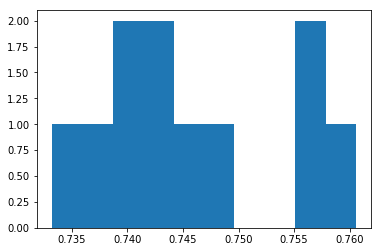

In [17]:
plt.hist(list(arrScoress[:,1]))
# arrScoress[:,1]

In [ ]:
scoress03 = []
for i in range(20):
    all_train,all_test = train_test_split(all8,test_size=0.3)
    all_test = all_test[all_test.index.get_level_values('copy_num')==0]
    
    max_count = max(all_train[np.logical_and(all_train.index.get_level_values('copy_num')==0 ,np.array(all_train.Class!='non-transient'))]['Class'].value_counts())
    g = all_train.groupby('Class')
    g=g.apply(lambda x: x.sample(max_count).reset_index(drop=True))
    all_train= g
    
    all_train['target'] = list(map(lambda x: manualFact(x),all_train['Class']))
    all_test['target'] = list(map(lambda x: manualFact(x),all_test['Class']))
    feats = np.array(ntran.columns[2:])
    print(len(feats))
    print(feats)
    
    model,params = rf()

    grid_search = GridSearchCV(model, params, cv=StratifiedKFold(2), scoring=scorers(),
                                   refit='f1_score', return_train_score=True,verbose=100)
    grid_search.fit(all_train[feats], all_train.target)
    # Copy classifier
    clf = grid_search
    scores = precision_recall_fscore_support(
        all_test.target, clf.predict(all_test[feats]), average='weighted')
    print('scores: ', scores)
    scoress.append(scores)

30
['amplitude' 'beyond1st' 'flux_percentile_ratio_mid20'
 'flux_percentile_ratio_mid35' 'flux_percentile_ratio_mid50'
 'flux_percentile_ratio_mid65' 'flux_percentile_ratio_mid80' 'kurtosis'
 'max_slope' 'median_absolute_deviation' 'median_buffer_range_percentage'
 'pair_slope_trend' 'pair_slope_trend_last_30' 'percent_amplitude'
 'percent_difference_flux_percentile' 'poly1_t1' 'poly2_t1' 'poly2_t2'
 'poly3_t1' 'poly3_t2' 'poly3_t3' 'poly4_t1' 'poly4_t2' 'poly4_t3'
 'poly4_t4' 'skew' 'small_kurtosis' 'std' 'stetson_j' 'stetson_k']
Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=0.7065334773218143, precision=0.7018129653845386, recall=0.7065334773218143, f1_score=0.7031731559502938, total=   2.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max

Text(0,0.5,'Frequency')

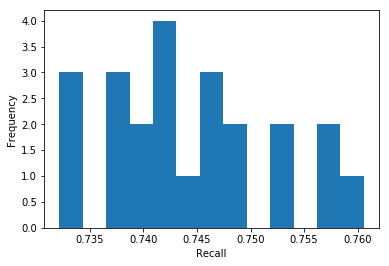

In [25]:
arrScoress = np.array(scoress)
plt.hist(list(arrScoress[:,1]),bins=13)
plt.xlabel('Recall')
plt.ylabel('Frequency')

In [26]:
np.mean(arrScoress[:,1])

0.7443581897059289